In [39]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split

In [9]:
adv = pd.read_csv('./datasets/advertising.csv', parse_dates=['Timestamp'])
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.3+ KB


In [10]:
adv[['Timestamp', 'Clicked on Ad', 'Country']]

,Timestamp,Clicked on Ad,Country
0,2016-03-27 00:53:11,0,Tunisia
1,2016-04-04 01:39:02,0,Nauru
2,2016-03-13 20:35:42,0,San Marino
3,2016-01-10 02:31:19,0,Italy
4,2016-06-03 03:36:18,0,Iceland
...,...,...,...
995,2016-02-11 21:49:00,1,Lebanon
996,2016-04-22 02:07:01,1,Bosnia and Herzegovina
997,2016-02-01 17:24:57,1,Mongolia
998,2016-03-24 02:35:54,0,Guatemala


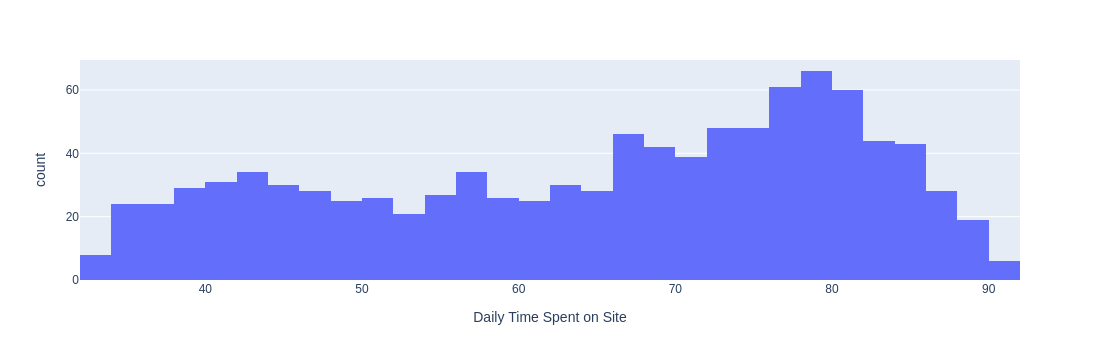

In [20]:
fig = (
    px.histogram(adv, x = 'Daily Time Spent on Site')
)
fig.show()

In [21]:
adv['City'].value_counts()

City
Lisamouth         3
Williamsport      3
Wrightburgh       2
Lake Jose         2
Robertfurt        2
                 ..
Burgessside       1
Hurleyborough     1
Garychester       1
East Kevinbury    1
Ronniemouth       1
Name: count, Length: 969, dtype: int64

In [27]:
(adv['Country'].value_counts() == 5).sum()

42

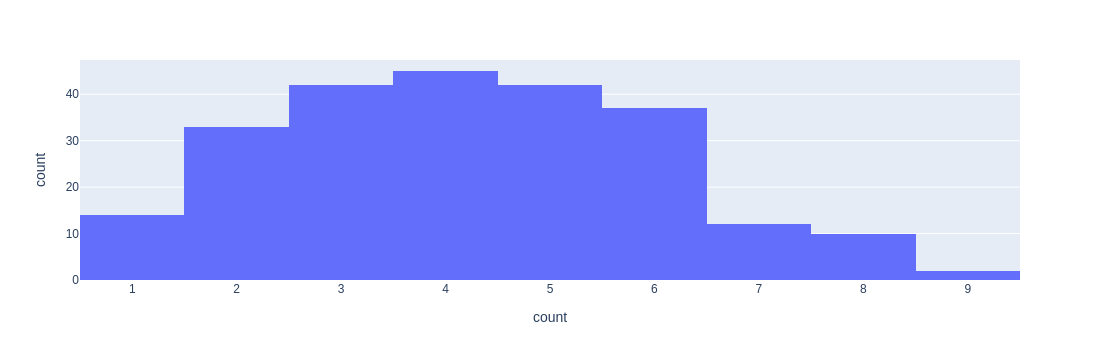

In [30]:
fig = (
    px.histogram(adv['Country'].value_counts(), x = 'count')
)
fig.show()

In [35]:
adv = (
    adv
    .drop(columns = ['Ad Topic Line', 'Timestamp', 'Area Income', 'City'])
)
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Daily Internet Usage      1000 non-null   float64
 3   Male                      1000 non-null   int64  
 4   Country                   1000 non-null   object 
 5   Clicked on Ad             1000 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 47.0+ KB


In [36]:
adv['Country'] = adv['Country'].astype('category')
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Daily Time Spent on Site  1000 non-null   float64 
 1   Age                       1000 non-null   int64   
 2   Daily Internet Usage      1000 non-null   float64 
 3   Male                      1000 non-null   int64   
 4   Country                   1000 non-null   category
 5   Clicked on Ad             1000 non-null   int64   
dtypes: category(1), float64(2), int64(3)
memory usage: 51.1 KB


In [37]:
adv.isna().sum()

Daily Time Spent on Site    0
Age                         0
Daily Internet Usage        0
Male                        0
Country                     0
Clicked on Ad               0
dtype: int64

In [38]:
X, y = adv.drop(columns = ['Clicked on Ad']), adv['Clicked on Ad']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 13, shuffle = True)

In [41]:
from catboost import CatBoostClassifier

In [42]:
model = CatBoostClassifier(iterations = 100, learning_rate = 0.1, depth = 6, verbose = 0)

In [44]:
model.fit(X_train, y_train, cat_features=['Country'])

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
y_predict = model.predict(X_test)

In [47]:
print(confusion_matrix(y_predict, y_test))
print(classification_report(y_predict, y_test))

[[51  1]
 [ 0 48]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.98      1.00      0.99        48

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

